训练集： 0.975
测试集： 0.9666666666666667


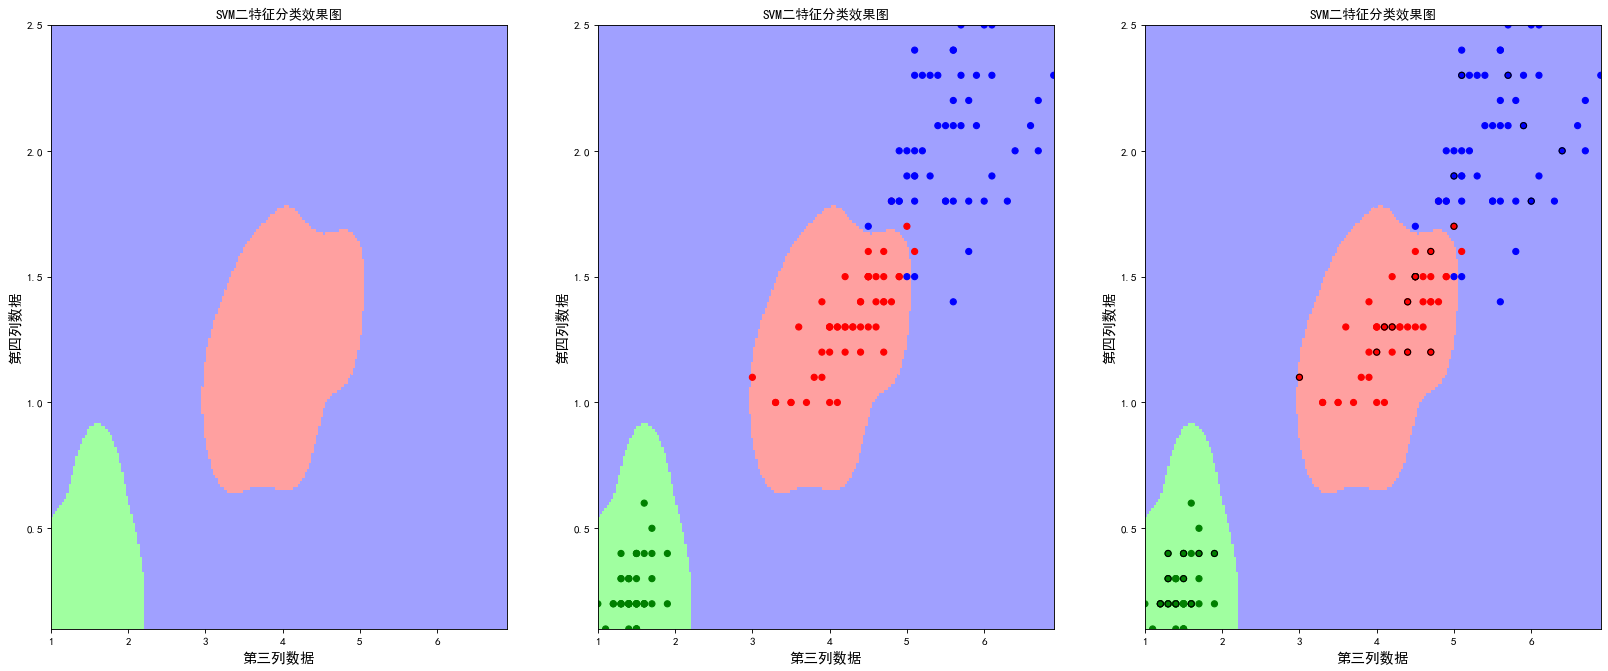

In [8]:
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sklearn
from sklearn.model_selection import train_test_split
 
#define converts(字典)
def Iris_label(s):
    it={b'Iris-setosa':0, b'Iris-versicolor':1, b'Iris-virginica':2 }
    return it[s] 
 
def showTitle():
    plt.xlabel('第三列数据', fontsize=13)
    plt.ylabel('第四列数据', fontsize=13)
    plt.xlim(x1_min,x1_max)
    plt.ylim(x2_min,x2_max)
    plt.title('SVM二特征分类效果图')
 
#1.读取数据集
path='./Iris.data'
data=np.loadtxt(path, dtype=float, delimiter=',', converters={4:Iris_label} )
#converters={4:Iris_label}中“4”指的是第5列：将第5列的str转化为label(number)
#print(data.shape)
 
#2.划分数据与标签
#x为数据，y为标签
x,y=np.split(data,indices_or_sections=(4,),axis=1)
x=x[:,2:4]
train_data,test_data,train_label,test_label =train_test_split(x,y, random_state=1, train_size=0.8,test_size=0.2)
#print(train_data.shape)
 
#3.训练svm分类器
classifier=svm.SVC(C=2,kernel='rbf',gamma=10,decision_function_shape='ovr') # ovr:一对多策略
classifier.fit(train_data,train_label.ravel()) #ravel函数在降维时默认是行序优先
 
#4.计算svc分类器的准确率
#print("训练集：",classifier.score(train_data,train_label))
#print("测试集：",classifier.score(test_data,test_label))
#也可直接调用accuracy_score方法计算准确率
from sklearn.metrics import accuracy_score
tra_label=classifier.predict(train_data) #训练集的预测标签
tes_label=classifier.predict(test_data) #测试集的预测标签
print("训练集：", accuracy_score(train_label,tra_label) )
print("测试集：", accuracy_score(test_label,tes_label) )
 
#查看决策函数
#print('train_decision_function:\n',classifier.decision_function(train_data)) # (90,3)
#print('predict_result:\n',classifier.predict(train_data))


#5.绘制图形
#确定坐标轴范围
x1_min, x1_max=x[:,0].min(), x[:,0].max() #第0维特征的范围
x2_min, x2_max=x[:,1].min(), x[:,1].max() #第1维特征的范围
x1,x2=np.mgrid[x1_min:x1_max:200j, x2_min:x2_max:200j ] #生成网络采样点
grid_test=np.stack((x1.flat,x2.flat) ,axis=1) #测试点
#指定默认字体
matplotlib.rcParams['font.sans-serif']=['SimHei']
#设置颜色
cm_light=matplotlib.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
cm_dark=matplotlib.colors.ListedColormap(['g','r','b'] )
 
grid_hat = classifier.predict(grid_test)       # 预测分类值
grid_hat = grid_hat.reshape(x1.shape)  # 使之与输入的形状相同

plt.figure(figsize=(25,10), dpi=80)
plt.figure(1)

ax1 = plt.subplot(131) 
plt.pcolormesh(x1, x2, grid_hat, cmap=cm_light)     # 预测值的显示
showTitle()

ax2 = plt.subplot(132)
plt.pcolormesh(x1, x2, grid_hat, cmap=cm_light)     # 预测值的显示
plt.scatter(x[:, 0], x[:, 1], c=y[:,0], s=30,cmap=cm_dark)  # 样本
showTitle()

ax3 = plt.subplot(133)
plt.pcolormesh(x1, x2, grid_hat, cmap=cm_light)     # 预测值的显示
plt.scatter(x[:, 0], x[:, 1], c=y[:,0], s=30,cmap=cm_dark)  # 样本
plt.scatter(test_data[:,0],test_data[:,1], c=test_label[:,0],s=30,edgecolors='k', zorder=2,cmap=cm_dark) #圈中测试集样本点
showTitle()

plt.show()